In [1]:
import json, pycm, numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [2]:
cm_1 = pycm.ConfusionMatrix(matrix=json.load(open('experiments/gpt-4_oed_european_2023-08-29T13:03:30.398606.json', 'r'))["confusion_matrix"])
cm_2 = pycm.ConfusionMatrix(matrix=json.load(open('experiments/gpt-4_oed_european_2023-08-29T13:03:30.398606.json', 'r'))["confusion_matrix"])
cm_3 = pycm.ConfusionMatrix(matrix=json.load(open('experiments/gpt-4_oed_european_2023-08-29T13:03:30.398606.json', 'r'))["confusion_matrix"])

In [3]:
print(pycm.Compare({"OED": cm_1, "Definition 2": cm_2, "Definition 3": cm_3}))

Best : None

Rank   Name            Class-Score       Overall-Score
1      Definition 3    0.34583           0.5381
1      Definition 2    0.34583           0.5381
1      OED             0.34583           0.5381



/Users/bradleyallen/Documents/GitHub/conceptual-engineering-using-llms/lib/python3.11/site-packages/pycm/pycm_compare.py:86: RuntimeWarning: Confusion matrices are too close and the best one can not be recognized.
  warn(COMPARE_RESULT_WARNING, RuntimeWarning)


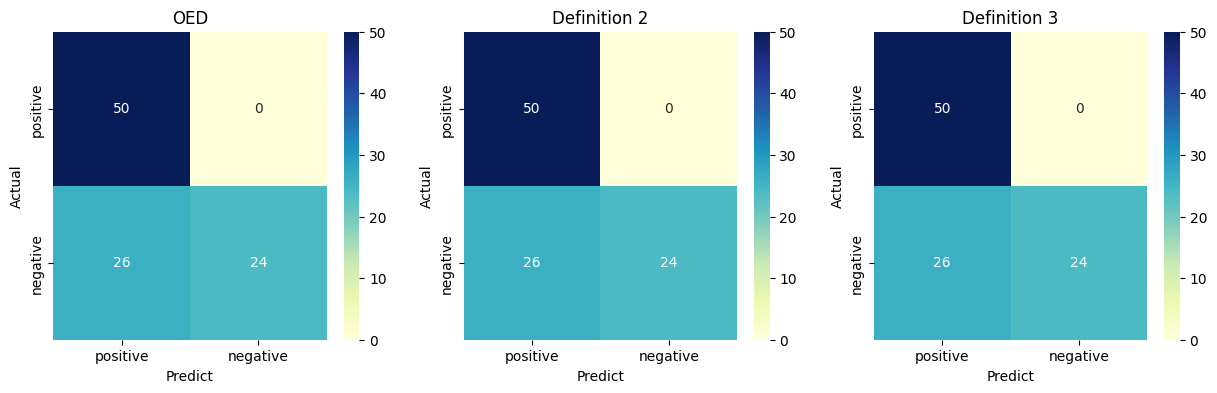

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for ax, (name, cm) in zip(axes, [ ("OED", cm_1), ("Definition 2", cm_2), ("Definition 3", cm_3) ]):
    df = pd.DataFrame(cm.matrix).T.fillna(0)
    sns.heatmap(df, annot=True, fmt='d', cmap="YlGnBu", ax=ax)
    ax.set_title(name)
    ax.set(xlabel='Predict', ylabel='Actual')
plt.show()

In [5]:
pd.DataFrame({"Krippendorff's Alpha": [ cm_1.SOA9, cm_2.SOA9, cm_3.SOA9 ]}, index=[ "OED", "Definition 2", "Definition 3"])

,Krippendorff's Alpha
OED,Low
Definition 2,Low
Definition 3,Low


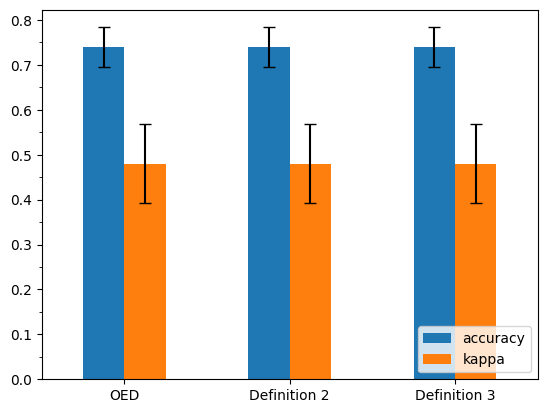

In [6]:
accuracy = [ cm.overall_stat["Overall ACC"] for cm in [ cm_1, cm_2, cm_3 ] ]
accuracy_se = [ cm.CI("Overall ACC")[0] for cm in [ cm_1, cm_2, cm_3 ] ]
kappa = [ cm.Kappa for cm in [ cm_1, cm_2, cm_3 ] ]
kappa_se = [ cm.CI("Kappa")[0] for cm in [ cm_1, cm_2, cm_3 ] ]
index = [ "OED", "Definition 2", "Definition 3"]
df = pd.DataFrame({'accuracy': accuracy, 'kappa': kappa}, index=index)
df_se = pd.DataFrame({'accuracy': accuracy_se, 'kappa': kappa_se}, index=index)
fig, ax = plt.subplots()
ax.set_yticks(np.arange(0.05,1.0,0.05), minor=True)
df.plot.bar(yerr=df_se, ax=ax, capsize=4, rot=0).legend(loc='lower right')
plt.show()

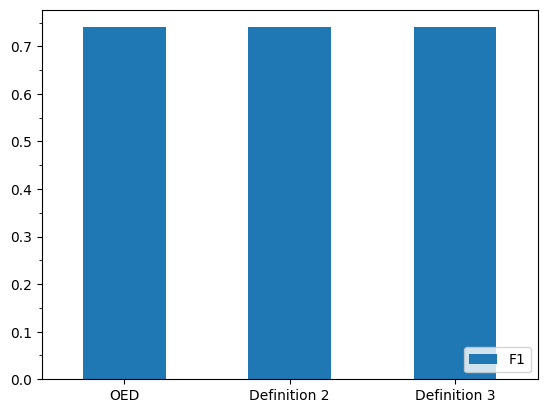

In [7]:
f1_micro = [ cm.F1_Micro for cm in [ cm_1, cm_2, cm_3 ] ]
index = [ "OED", "Definition 2", "Definition 3"]
df = pd.DataFrame({'F1': f1_micro}, index=index)
fig, ax = plt.subplots()
ax.set_yticks(np.arange(0.05,1.0,0.05), minor=True)
df.plot.bar(ax=ax, capsize=4, rot=0).legend(loc='lower right')
plt.show()